# Global Terror Attacks

## Intro

The Global Terrorism Database GTD is an open-source database including information on terrorist attacks around the world from 1970 through 2019. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism START, headquartered at the University of Maryland.

According to the FBI, international terrorism is defined as "violent, criminal acts committed by individuals and/or groups who are inspired by, or associated with, designated foreign terrorist organizations or nations (state-sponsored)".

The purpose of this analysis is to discover what trends in the data there are and what it can tell us about global terrorism attacks in terms of where they occur, the types of terrorist attacks, what weapons were used, who the terrorist targets are, and who the largest terrorist groups are.

The variables of interest in this analysis are:

- Year: Year the attack took place (1970-2017 is the range)
- Country: Country the terrorist attack took place in
- Region: Region the terrorist attack took place in
- City: City the terrorist attack took place in
- Attack Type: How the terrorist attacked the victim
- Weapon Type: Weapon used by terrorist to attack the victim
- Target: Who the target of this terrorist attack is
- Affiliation: What terrorist group is the terrorist part of

### Goals

- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform some Preprocessing to get the field that needs to be given the prime focus
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Data Processing

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
df = pd.read_csv(r'C:\Users\jadaj\OneDrive\Desktop\SCHOOL\globalterrorismdb_0718dist.csv',encoding='latin1')
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiquï¿½ to a l...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [40]:
print(f'Dataframe Rows: {df.shape[0]}')
print(f'Dataframe Columns: {df.shape[1]}')

Dataframe Rows: 181691
Dataframe Columns: 135


In [41]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Since this is a very large datset with 135 columns we are going to filter the dataframe with only neccessary columns for this analysis and rename them for easier understandong

In [42]:
#Renaming the columns
df.rename(columns={'iyear':'Year',
                   'imonth':'Month',
                   'iday':'Day',
                   'country_txt':'Country',
                   'region_txt':'Region',
                   'attacktype1_txt':'AttackType',
                   'targtype1_txt':'TargetType',
                   'targsubtype1_txt':'TargetSubType',
                   'weaptype1_txt':'WeaponType',
                   'gname':'Group',
                   'nkill':'Killed',
                   'nwound':'Wounded',
                   'propextent_txt' : 'Property Damage',
                   'motive':'Motive'},inplace=True)

In [43]:
#Extracting Necessary Columns
df=df[['eventid','Year','Month','Day','Country','Region', 'city', 'AttackType','TargetType','TargetSubType'
       ,'Killed','Wounded','success', 'suicide', 'Group','WeaponType','Property Damage','Motive']]

In [44]:
#First Ten Entries
df.head(10)

,eventid,Year,Month,Day,Country,Region,city,AttackType,TargetType,TargetSubType,Killed,Wounded,success,suicide,Group,WeaponType,Property Damage,Motive
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,1.0,0.0,1,0,MANO-D,Unknown,NaN,NaN
1,197000000002,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0,0.0,1,0,23rd of September Communist League,Unknown,NaN,NaN
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,1.0,0.0,1,0,Unknown,Unknown,NaN,NaN
3,197001000002,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,NaN,1,0,Unknown,Explosives,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,NaN,1,0,Unknown,Incendiary,NaN,NaN
5,197001010002,1970,1,1,United States,North America,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",0.0,0.0,1,0,Black Nationalists,Firearms,Minor (likely < $1 million),To protest the Cairo Illinois Police Deparment
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,Assassination,Police,Police Security Forces/Officers,0.0,0.0,0,0,Tupamaros (Uruguay),Firearms,NaN,NaN
7,197001020002,1970,1,2,United States,North America,Oakland,Bombing/Explosion,Utilities,Electricity,0.0,0.0,1,0,Unknown,Explosives,Minor (likely < $1 million),NaN
8,197001020003,1970,1,2,United States,North America,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,0.0,0.0,1,0,New Year's Gang,Incendiary,Minor (likely < $1 million),To protest the War in Vietnam and the draft
9,197001030001,1970,1,3,United States,North America,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,0.0,0.0,1,0,New Year's Gang,Incendiary,Minor (likely < $1 million),To protest the War in Vietnam and the draft


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   Year             181691 non-null  int64  
 2   Month            181691 non-null  int64  
 3   Day              181691 non-null  int64  
 4   Country          181691 non-null  object 
 5   Region           181691 non-null  object 
 6   city             181257 non-null  object 
 7   AttackType       181691 non-null  object 
 8   TargetType       181691 non-null  object 
 9   TargetSubType    171318 non-null  object 
 10  Killed           171378 non-null  float64
 11  Wounded          165380 non-null  float64
 12  success          181691 non-null  int64  
 13  suicide          181691 non-null  int64  
 14  Group            181691 non-null  object 
 15  WeaponType       181691 non-null  object 
 16  Property Damage  64065 non-null   obje

In [46]:
df.isnull().sum()

eventid                 0
Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
city                  434
AttackType              0
TargetType              0
TargetSubType       10373
Killed              10313
Wounded             16311
success                 0
suicide                 0
Group                   0
WeaponType              0
Property Damage    117626
Motive             131130
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df['city'] = df['city'].fillna('Unknown')
df['TargetSubType'] = df['TargetSubType'].fillna('Unknown')
df["Property Damage"] = df['Property Damage'].fillna('Unknown')
df['Motive'] = df['Motive'].fillna('Unknown')
df['Killed'] = df['Killed'].fillna(df['Killed'].mode()[0])
df['Wounded'] = df['Wounded'].fillna(df['Wounded'].mode()[0])
df["Casualty"]=df["Killed"]+df["Wounded"]

df.head(10)

,eventid,Year,Month,Day,Country,Region,city,AttackType,TargetType,TargetSubType,Killed,Wounded,success,suicide,Group,WeaponType,Property Damage,Motive,Casualty
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,1.0,0.0,1,0,MANO-D,Unknown,Unknown,Unknown,1.0
1,197000000002,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0,0.0,1,0,23rd of September Communist League,Unknown,Unknown,Unknown,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,1.0,0.0,1,0,Unknown,Unknown,Unknown,Unknown,1.0
3,197001000002,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,0.0,0.0,1,0,Unknown,Explosives,Unknown,Unknown,0.0
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,0.0,0.0,1,0,Unknown,Incendiary,Unknown,Unknown,0.0
5,197001010002,1970,1,1,United States,North America,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",0.0,0.0,1,0,Black Nationalists,Firearms,Minor (likely < $1 million),To protest the Cairo Illinois Police Deparment,0.0
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,Assassination,Police,Police Security Forces/Officers,0.0,0.0,0,0,Tupamaros (Uruguay),Firearms,Unknown,Unknown,0.0
7,197001020002,1970,1,2,United States,North America,Oakland,Bombing/Explosion,Utilities,Electricity,0.0,0.0,1,0,Unknown,Explosives,Minor (likely < $1 million),Unknown,0.0
8,197001020003,1970,1,2,United States,North America,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,0.0,0.0,1,0,New Year's Gang,Incendiary,Minor (likely < $1 million),To protest the War in Vietnam and the draft,0.0
9,197001030001,1970,1,3,United States,North America,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,0.0,0.0,1,0,New Year's Gang,Incendiary,Minor (likely < $1 million),To protest the War in Vietnam and the draft,0.0


In [49]:
df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
Country            0
Region             0
city               0
AttackType         0
TargetType         0
TargetSubType      0
Killed             0
Wounded            0
success            0
suicide            0
Group              0
WeaponType         0
Property Damage    0
Motive             0
Casualty           0
dtype: int64

In [50]:
df = df.astype({'Killed' : 'int', 'Wounded' : 'int'})
df['Property Damage'] = df['Property Damage'].replace({'Minor (likely < $1 million)':'Minor: Likely Less than $1 Million',
                                                                                     'Major (likely >= $1 million but < $1 billion)':'Major: Between $1 Million - $1 Billion',
                                                                                     'Catastrophic (likely >= $1 billion)':'Catastrophic: Likely more than $1 Billion'})

In [51]:
df.describe()

,eventid,Year,Month,Day,Killed,Wounded,success,suicide,Casualty
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,2.266860,2.883291,0.889598,0.036507,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,11.227057,34.309746,0.313391,0.187549,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,2.000000,2.000000,1.000000,0.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1570.000000,8191.000000,1.000000,1.000000,9574.000000


## Exploratory Data Analysis

### Number of Global Attacks per year

Text(0, 0.5, 'Incidents')

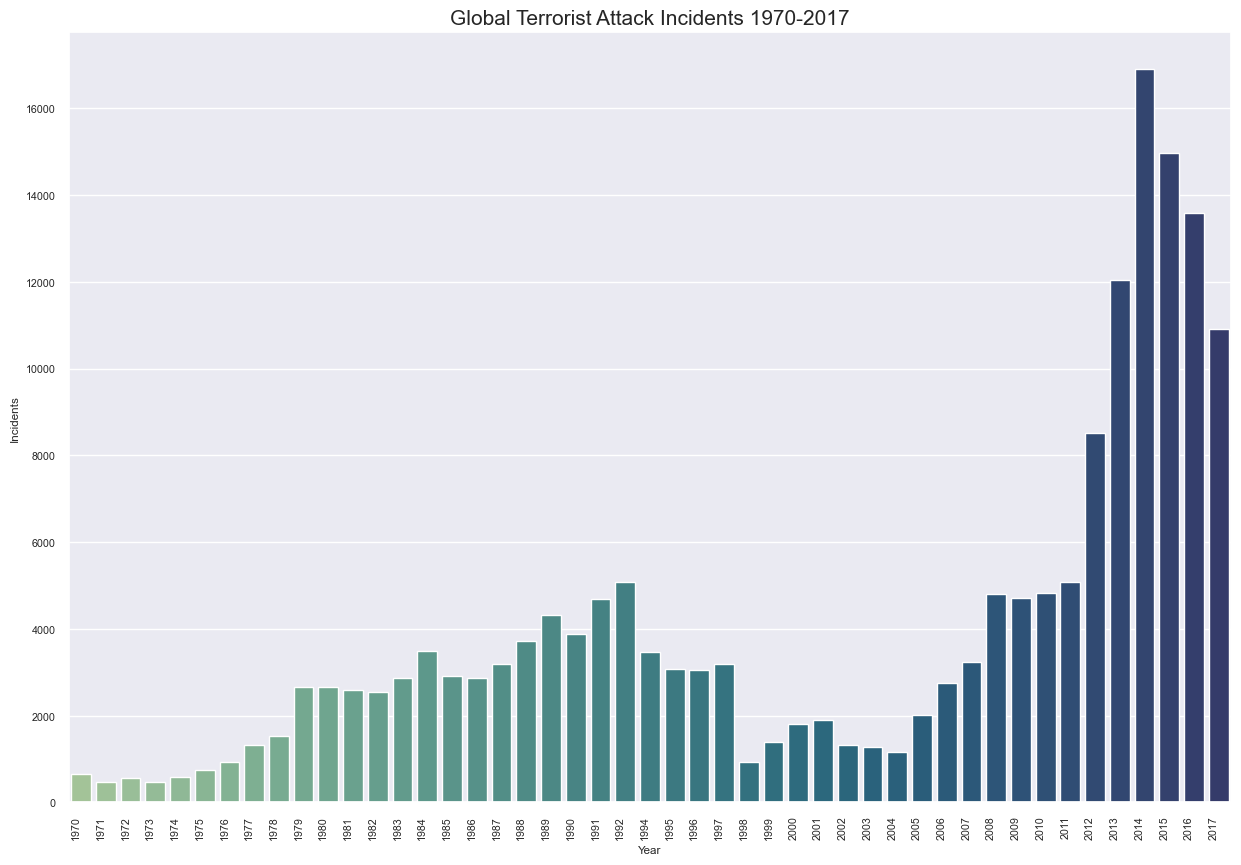

In [53]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Year',data=df,palette='crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack Incidents 1970-2017',size=15)
plt.ylabel('Incidents')

We can see here that attacks slowly start to increase from 1970 until about 1993 where until 2003 we see a downward global trend in Terrorist incidents.Then there is a sharp rise in the number of attacks/incidents.Since 2014 and 2015 has a large number of Terrorist activities.

### Terrorist Attack by Region

Text(0.5, 1.0, 'Number of Terrorist Attack by Region')

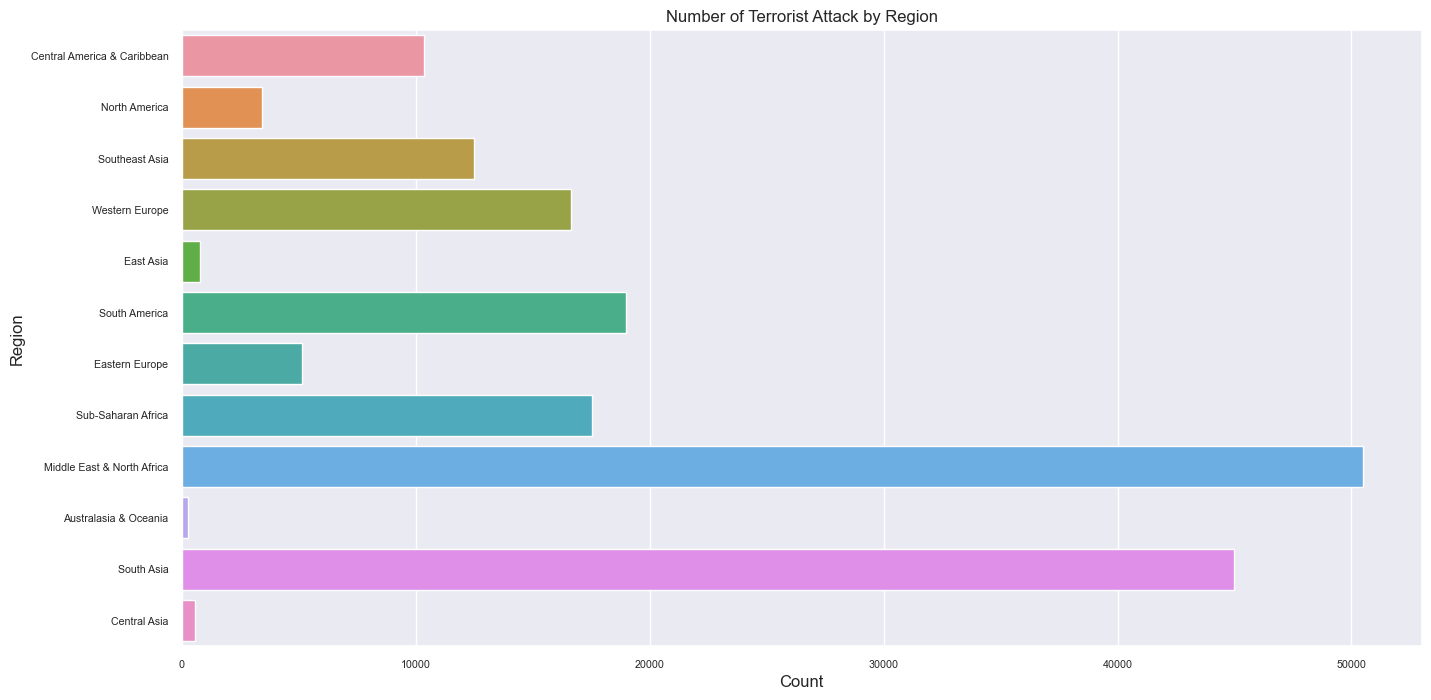

In [54]:
plt.figure(figsize=(16, 8))

sns.set(font_scale=0.7)
sns.countplot(y='Region', data= df)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of Terrorist Attack by Region', fontsize=12)

In [55]:
df['success'].value_counts()

1    161632
0     20059
Name: success, dtype: int64

Text(0.5, 1.0, 'Succed/Failed Terrorist Attacks')

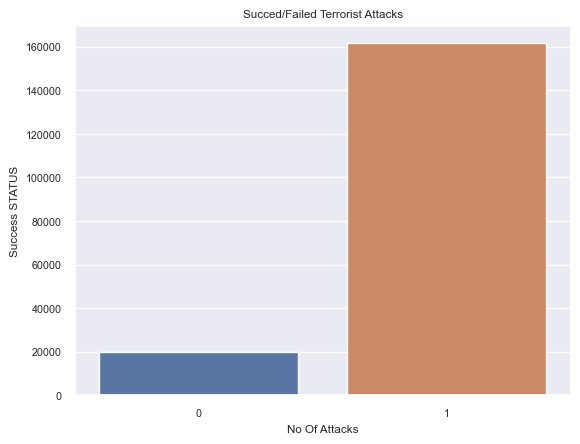

In [56]:
sns.countplot(x='success', data = df)
plt.ylabel('Success STATUS')
plt.xlabel('No Of Attacks')
plt.title('Succed/Failed Terrorist Attacks')

Here it becomes very clear how the overall trend over attacks has changed over the years in different regions across the globe. We can also see that come we experience the same jump in numbers and see that the Middle East and North Africa along with South Asia are the hardest hit by terrorist attacks. We also see that majority of terrorist attacks were not able to be intervened and are successfully pulled off.

### Types of Terror Attack

Text(0, 0.5, 'Count')

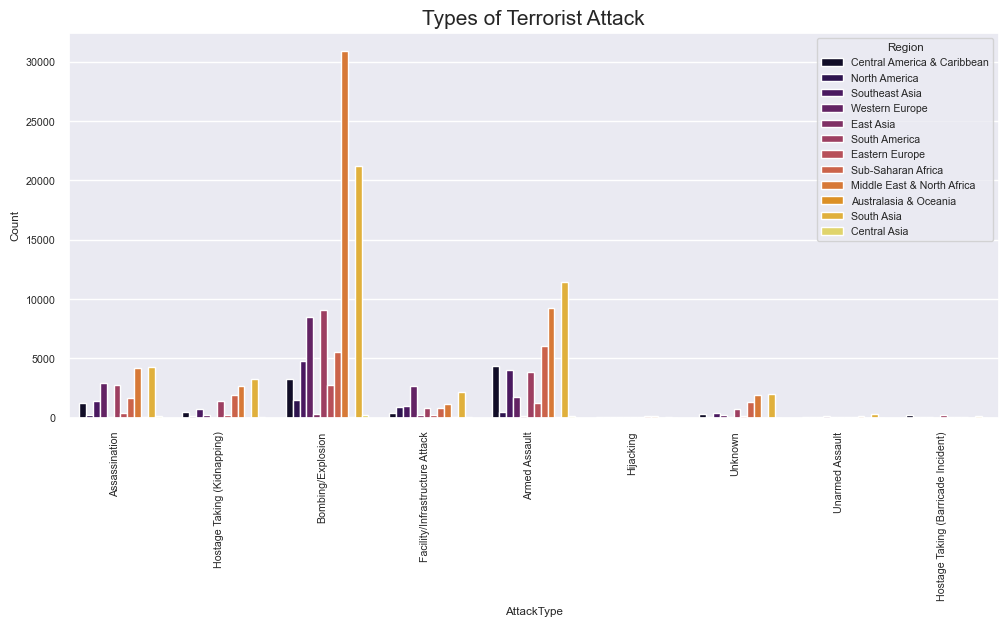

In [57]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='AttackType',data=df, hue='Region', palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Types of Terrorist Attack',size=15)
plt.ylabel('Count')

Bombing/Explosions are the widely favored method of attack with it being most prevalent amongst the Middle East & Africa and South Asia, our already confirmed hot zones for terrorist attacks

### Attacks and Killed

In [58]:
casualties = ['Killed', 'Wounded', 'Casualty']
terror = df.groupby(['Region'])[casualties].sum().reset_index()
terror['Total Attacks'] = df.groupby(["Region"]).size().reset_index(name= 'NoofAttacks')['NoofAttacks']

terror

,Region,Killed,Wounded,Casualty,Total Attacks
0,Australasia & Oceania,150,260,410.0,282
1,Central America & Caribbean,28708,8991,37699.0,10344
2,Central Asia,1000,2009,3009.0,563
3,East Asia,1152,9213,10365.0,802
4,Eastern Europe,7415,12045,19460.0,5144
5,Middle East & North Africa,137642,214308,351950.0,50474
6,North America,4916,21531,26447.0,3456
7,South America,28849,16704,45553.0,18978
8,South Asia,101319,141360,242679.0,44974
9,Southeast Asia,15637,26259,41896.0,12485


Text(0, 0.5, 'Count')

<Figure size 1500x1000 with 0 Axes>

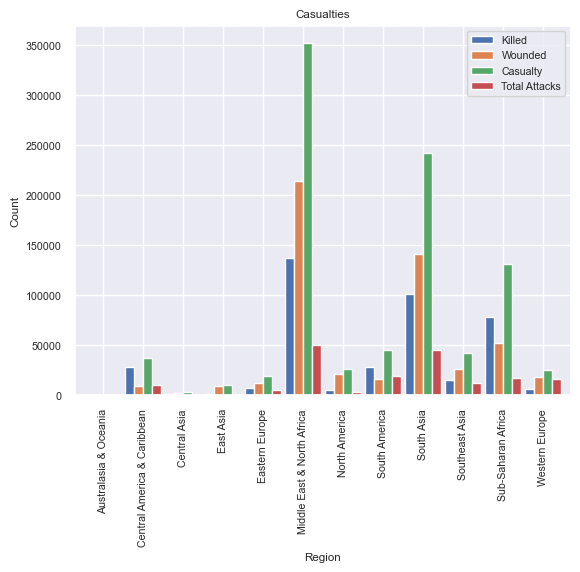

In [59]:
plt.figure(figsize=(15,10))

terror.plot.bar(x="Region", width=0.9)
plt.title('Casualties')
plt.ylabel('Count')

In [60]:
terror['Casualty%'] = terror['Casualty'] / terror['Total Attacks'] *100
terror['Killed%'] = terror['Killed'] / terror['Total Attacks']*100
terror['Wounded%'] = terror['Wounded'] / terror['Total Attacks']*100

percentages = terror[['Region', 'Casualty%', 'Killed%', 'Wounded%']]

percentages

,Region,Casualty%,Killed%,Wounded%
0,Australasia & Oceania,145.390071,53.191489,92.198582
1,Central America & Caribbean,364.452823,277.532869,86.919954
2,Central Asia,534.458259,177.619893,356.838366
3,East Asia,1292.394015,143.640898,1148.753117
4,Eastern Europe,378.304821,144.148523,234.156299
5,Middle East & North Africa,697.289694,272.698815,424.590878
6,North America,765.248843,142.245370,623.003472
7,South America,240.030562,152.012857,88.017705
8,South Asia,539.598435,225.283497,314.314938
9,Southeast Asia,335.570685,125.246296,210.324389


Comparing the total attacks for each region to its total number of casualities is eye opening. For the amount of total attacks the casualty amount is at minimum almost doubled. As expected the Middle East & Africa and South Asia are disportionality affected with a high amount of persons killed amd wounded with figures being in the hundred of thousands with other regions typically falling below 50,000. The Middle East and South Asia also had a casualty percentage of 700% and 540%, respectively with a higher amount of people wounded vs killed.

### Target Type Plot 

In [61]:
target_type = df.groupby(['TargetType']).size().reset_index(name='Count')
target_type.sort_values('Count', ascending= False)
target_type

,TargetType,Count
0,Abortion Related,263
1,Airports & Aircraft,1343
2,Business,20669
3,Educational Institution,4322
4,Food or Water Supply,317
5,Government (Diplomatic),3573
6,Government (General),21283
7,Journalists & Media,2948
8,Maritime,351
9,Military,27984


Text(0.5, 1.0, 'Type of Target')

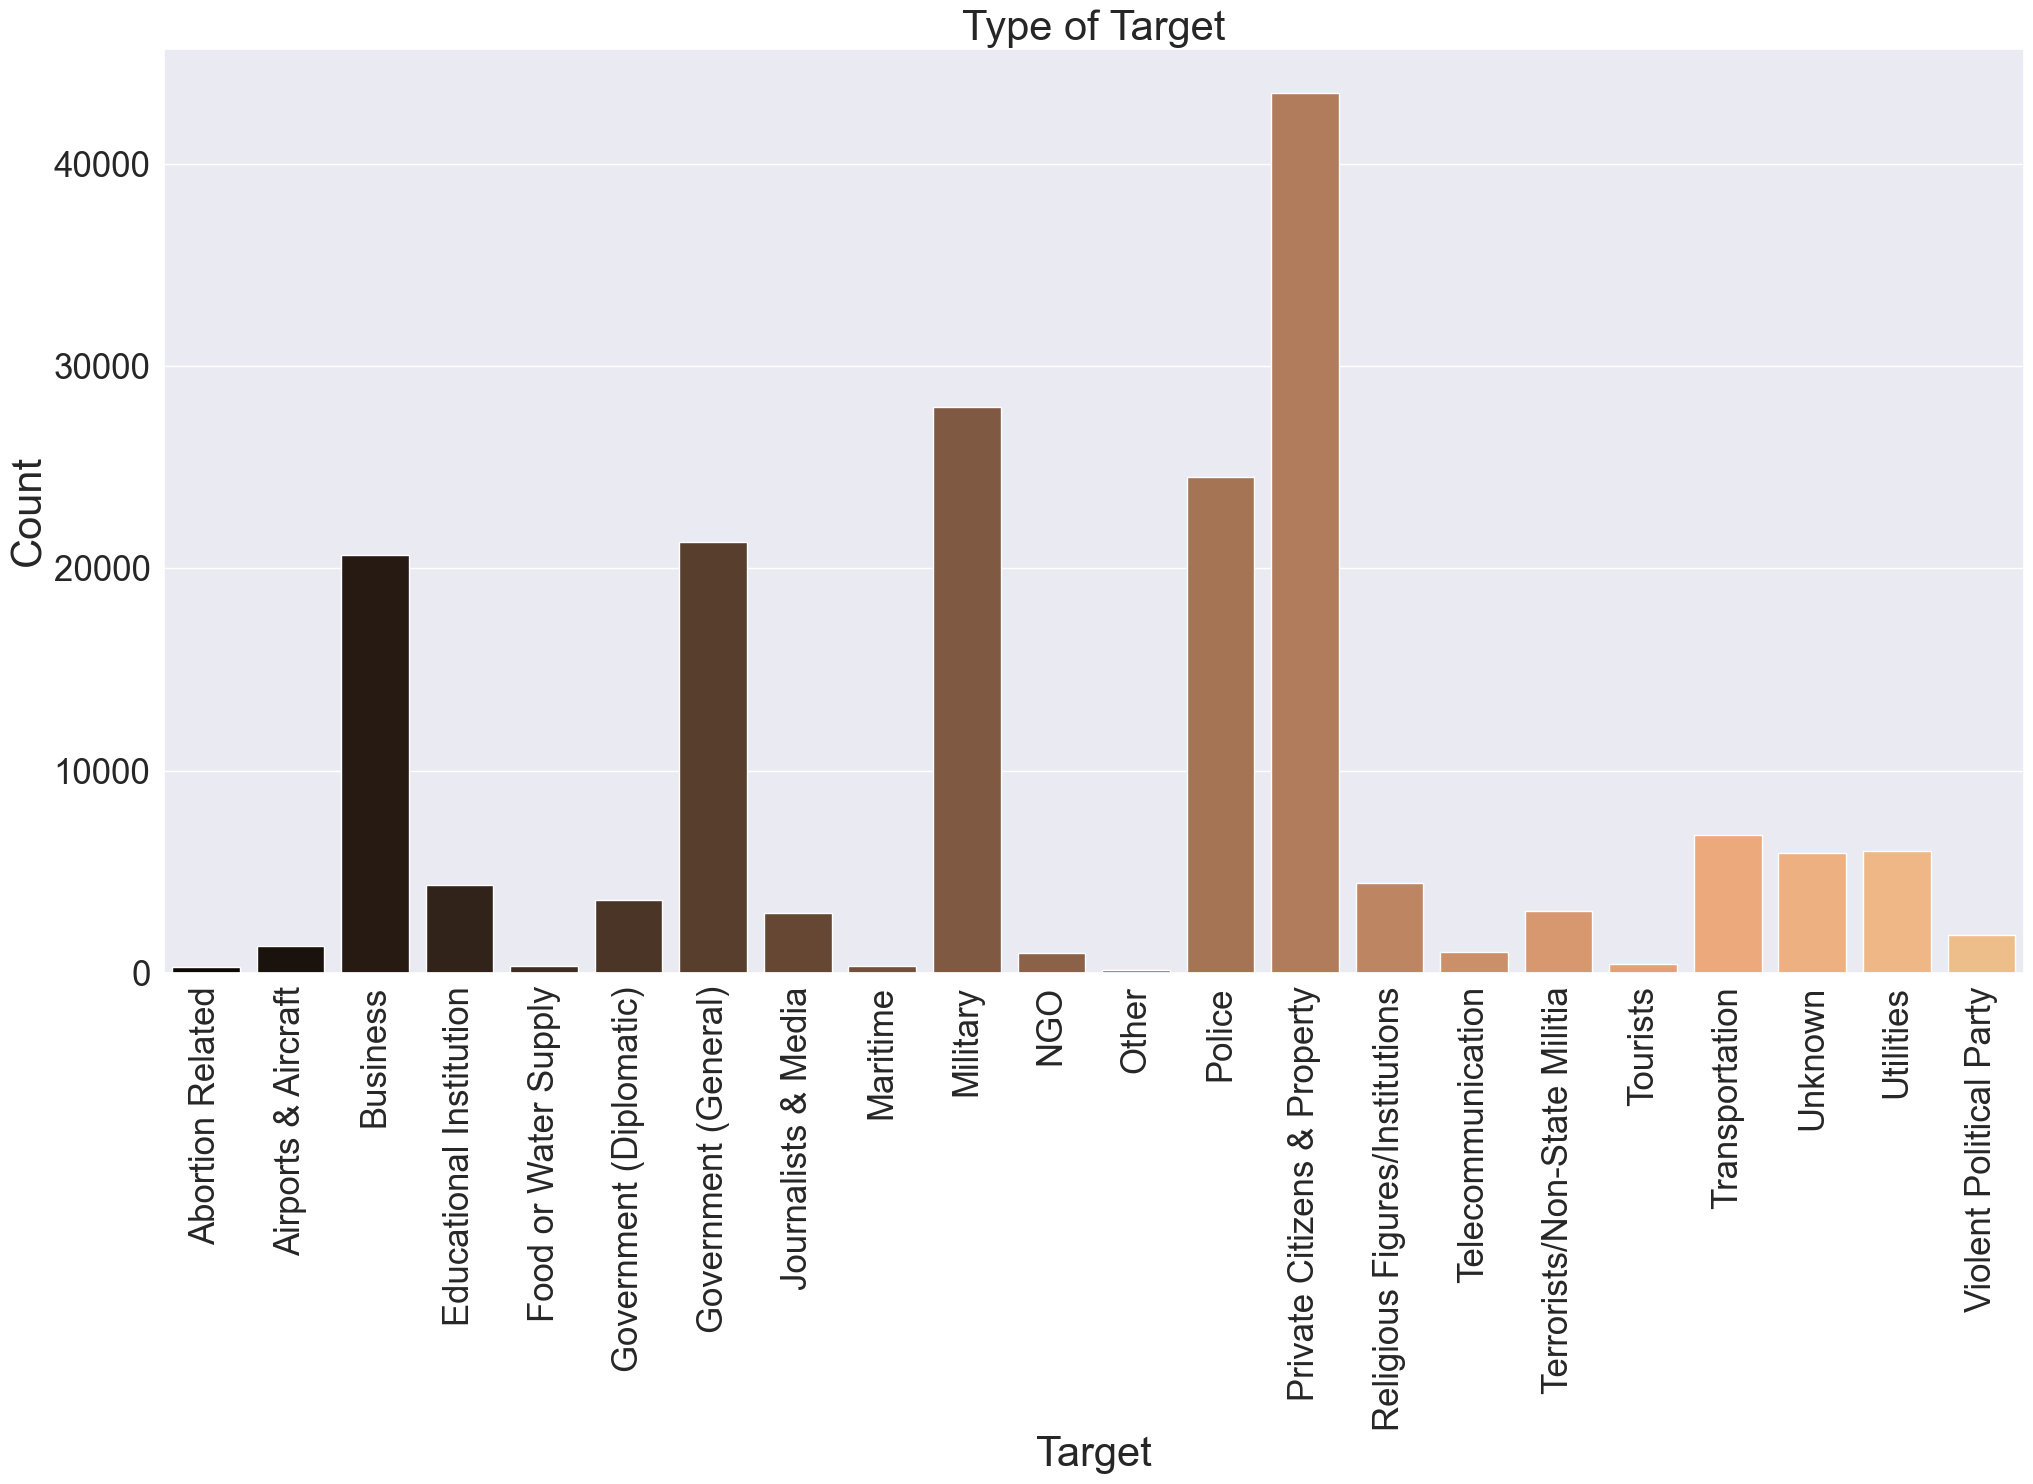

In [62]:
plt.figure(figsize=(24,12))

sns.barplot(x ='TargetType', y='Count', data = target_type, palette='copper',)

plt.xticks(rotation=90)
plt.tick_params(axis= 'both', which= 'major', labelsize= 25)
plt.ylabel("Count" ,fontsize = 30)
plt.xlabel("Target",fontsize = 30)
plt.title('Type of Target',size=30)

We can see overwhelmingly that the most frequent target is civilians who as a result also suffer the most at the hands of terrorists.

### Total Number of Terrorist Attack in each country

Text(0.5, 1.0, 'Top-10:Total Attacks by Country')

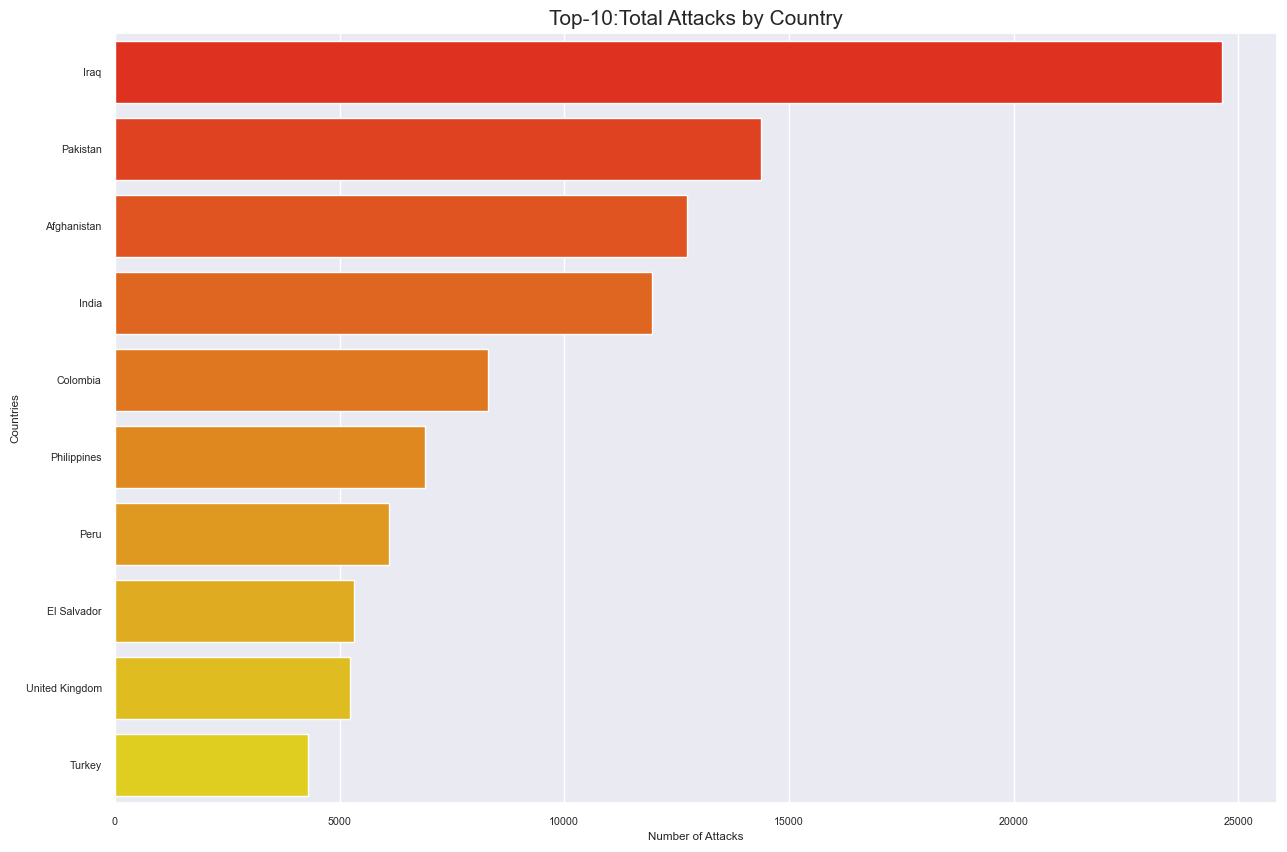

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(x = df['Country'].value_counts().values[:10], y = df['Country'].value_counts()[:10].index,palette = 'autumn')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10:Total Attacks by Country',size=15)

### Top 10 Terrorist Group

In [64]:
top_10_groups = df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]

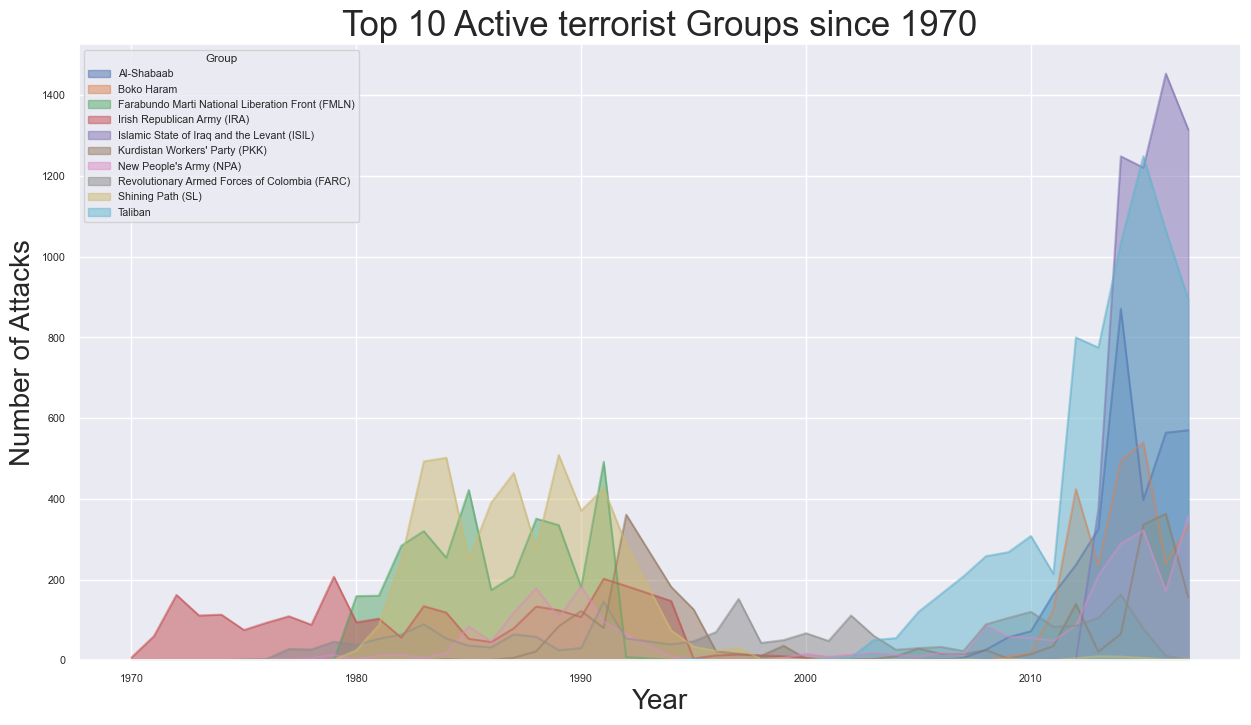

In [65]:
pd.crosstab(top_10_groups['Year'], top_10_groups['Group']).plot(kind='area',stacked=False,figsize=(15,8))
plt.title('Top 10 Active terrorist Groups since 1970',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

'Islamic State of Iraq & the Levant (ISIL)' tops the chart with more than 1400 attacks while 'Taliban' comes second

### Iraq Terrorism Analysis

In [67]:
#Preparing the data for analysis
Iraq = df[df['Country'] == 'Iraq']
Iraq_cities = Iraq.groupby(by='city',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

Iraq_suicide_size = Iraq['suicide'].sum() / len(Iraq)
labels = ['Suicide', 'Not Suicide']

Iraq_year = Iraq.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

Iraq_weapon = Iraq.groupby(by='WeaponType',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:,:2]

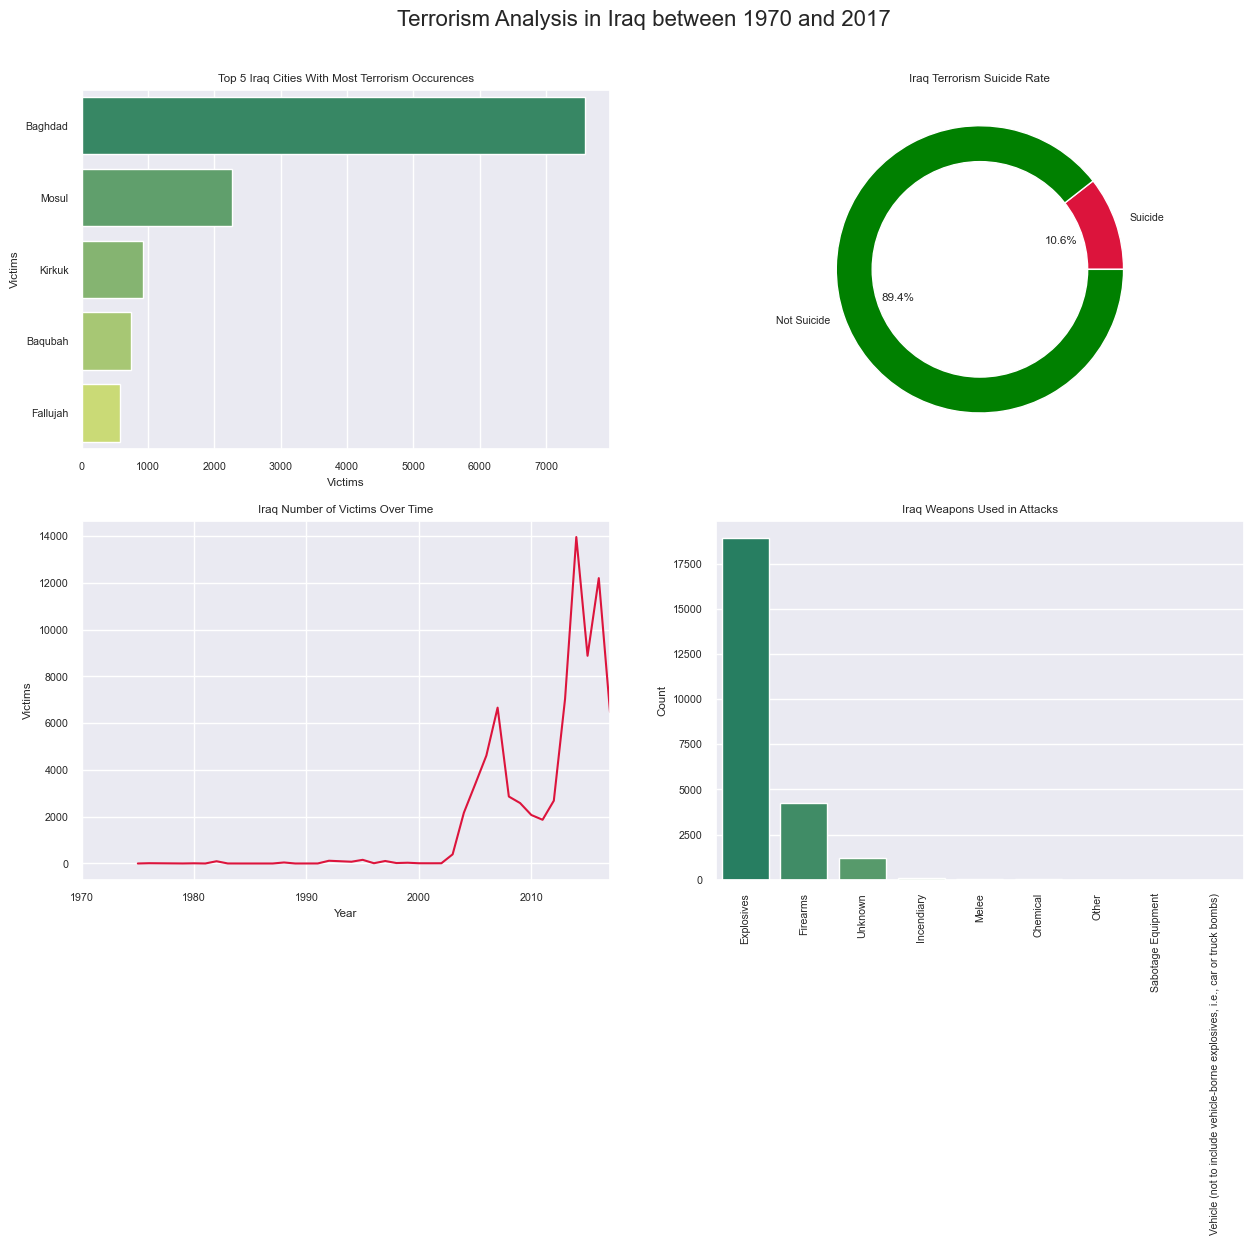

In [68]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='city', data=Iraq_cities, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 Iraq Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((Iraq_suicide_size, 1-Iraq_suicide_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Iraq Terrorism Suicide Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=Iraq_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Iraq Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='eventid', data=Iraq_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Iraq Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in Iraq between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()

In [69]:
filtered = Iraq[Iraq['Group'] != 'Unknown']
filt1 = Iraq[(Iraq['Motive'] != 'Unknown') & (Iraq['Motive'] != 'The specific motive for the attack is unknown.')] 
filt4 = Iraq[Iraq['Property Damage'] != 'Unknown']               

print("Year With The Most Attacks:",Iraq['Year'].value_counts().idxmax())

print("Most Common Motive:",filt1['Motive'].value_counts().idxmax())

print("Average Property Damage:",filt4['Property Damage'].value_counts().idxmax())

print("Most Common Attack Type:",Iraq['AttackType'].value_counts().idxmax())

print("Most Common Weapon Type:",Iraq['WeaponType'].value_counts().idxmax())

print("Most Common Target Type:",Iraq['TargetType'].value_counts().idxmax())

print('Terrorist Group with Highest Number Of Terror Attacks:', filtered['Group'].value_counts().idxmax())

Year With The Most Attacks: 2014
Most Common Motive: The specific motive is unknown; however, sources suspected that the attack, which targeted members of the Sunni community, may have been part of a larger trend of sectarian violence between Iraq's minority Sunni and majority Shiite communities.
Average Property Damage: Minor: Likely Less than $1 Million
Most Common Attack Type: Bombing/Explosion
Most Common Weapon Type: Explosives
Most Common Target Type: Private Citizens & Property
Terrorist Group with Highest Number Of Terror Attacks: Islamic State of Iraq and the Levant (ISIL)


### India Terrorism Analysis

In [70]:
india = df[df['Country'] == 'India']
india_cities = india.groupby(by='city',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

india_suicide_size = india['suicide'].sum() / len(india)
labels = ['Suicide', 'Not Suicide']

india_year = india.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

india_weapon = india.groupby(by='WeaponType',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:,:2]

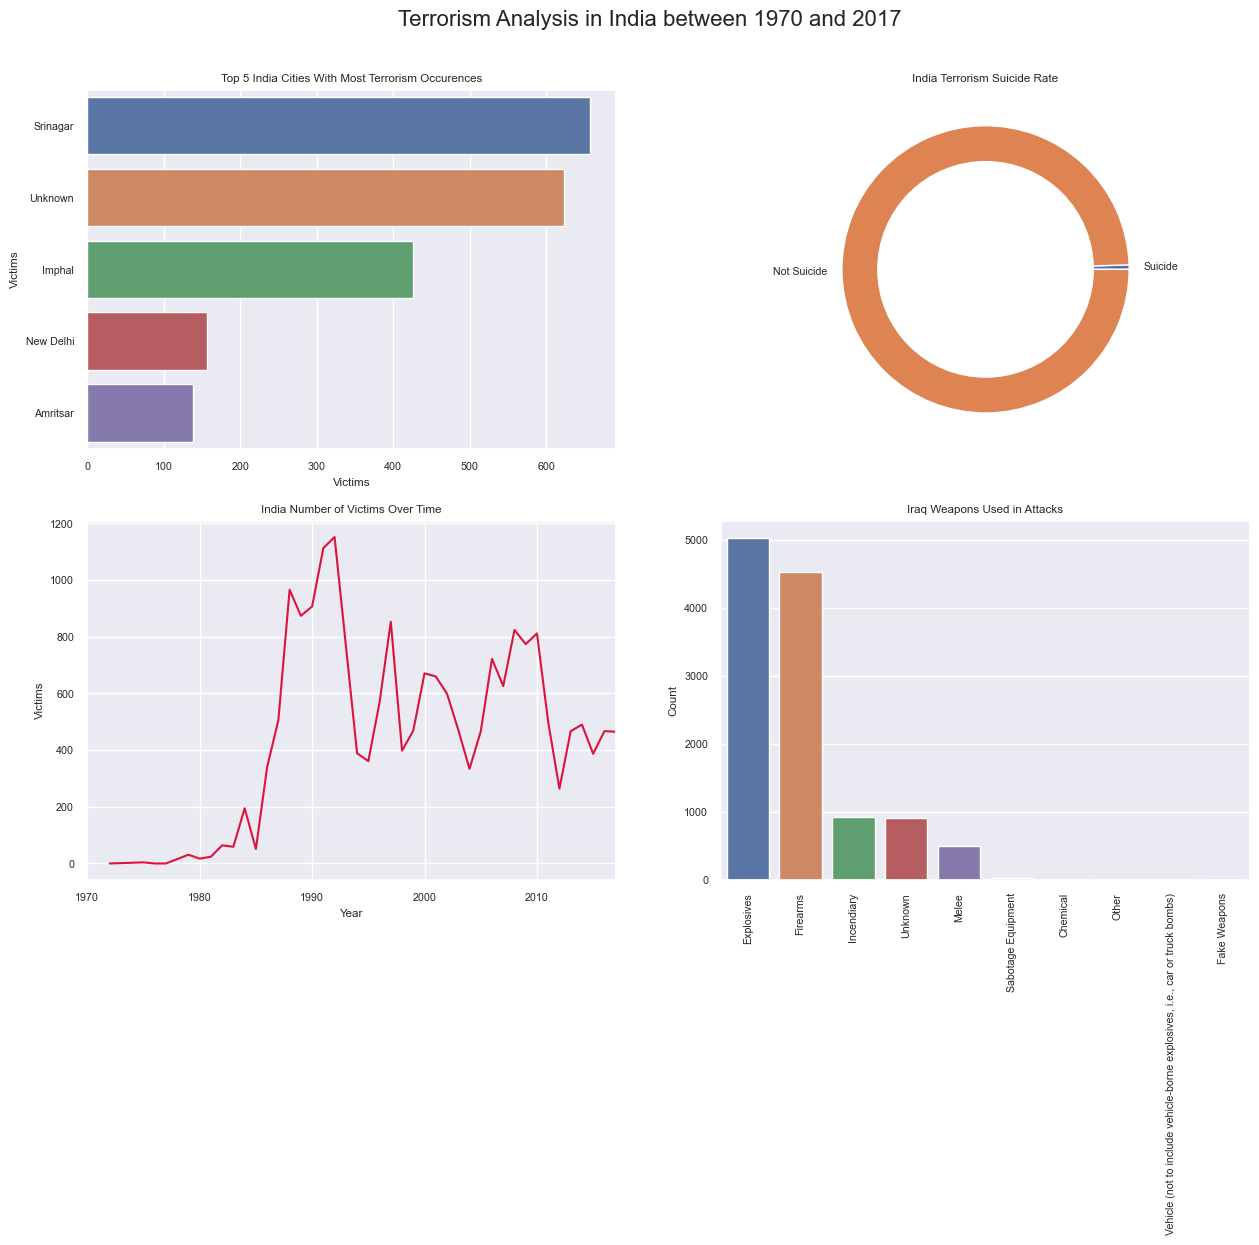

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='city', data=india_cities, ci=None, ax=axs[0, 0])
axs[0, 0].set_title(f'Top 5 India Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((india_suicide_size, 1-india_suicide_size), labels=labels)
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('India Terrorism Suicide Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=india_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('India Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='eventid', data=india_weapon, ci=None, ax=axs[1, 1])
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Iraq Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in India between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()

In [72]:
filtered = india[india['Group'] != 'Unknown']
filt2 = india[(india['Motive'] != 'Unknown') & (india['Motive'] != 'The specific motive for the attack is unknown.')] 
filt3 = india[india['Property Damage'] != 'Unknown']              

print("Year With The Most Attacks:",india['Year'].value_counts().idxmax())

print("Most Common Motive:",filt2['Motive'].value_counts().idxmax())

print("Average Property Damage:",filt3['Property Damage'].value_counts().idxmax())


print("Most Common Attack Type:",india['AttackType'].value_counts().idxmax())

print("Most Common Weapon Type:",india['WeaponType'].value_counts().idxmax())

print("Most Common Target Type:",india['TargetType'].value_counts().idxmax())

print('Terrorist Group with Highest Number Of Terror Attacks:', filtered['Group'].value_counts().idxmax())

Year With The Most Attacks: 2016
Most Common Motive: The attack was carried out because the victim was accused of being a police informer.
Average Property Damage: Minor: Likely Less than $1 Million
Most Common Attack Type: Bombing/Explosion
Most Common Weapon Type: Explosives
Most Common Target Type: Private Citizens & Property
Terrorist Group with Highest Number Of Terror Attacks: Communist Party of India - Maoist (CPI-Maoist)


## Conclusions 

- Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.
- 89% of terrorist attacks are successfully attempted 
- Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
- Middle East and North Africa and South Asia are the two regions who encountered the most number of terror attacks since 1970.
- For most of the attacks, The target is Private Citizens & property and the next is on Military leads.
- Most of the attacks were through either Bombing or Explosion.
- 'Islamic State of Iraq & the Levant (ISIL)' and 'Taliban' are two most active Terorrist groups in the last 5 years.
- Srinagar and Baghdad are the most attacked cities 
- Private citizens and property are the most commonly affected by terroristic activity